<a href="https://colab.research.google.com/github/lukmanprasetyo/H8_KS009/blob/master/PYTN_KampusMerdeka_FP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

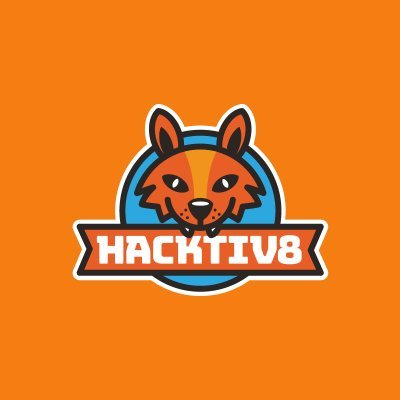

# **FINAL PROJECT 3**

Team :
1. NATALIE NOVENRODUMETASA PYTN-KS09-001
2. LUKMAN PRASETYO NUGROHO PYTN-KS09-004
3. ANUGRAH AIDIN YOTOLEMBAH PYTN-KS09-023



# **A. Perkenalan**

**Latar Belakang**

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.

Pada final project 3 kali ini, memakai dataset yang berasal dari kaggle yang berjudul Heart Failure Prediction, yang berisi tentang faktor-faktor kematian oleh gagal jantung yang memiliki 13 atribut dengan 299 rows. Atribut yang menjadi target yaitu atribut Death Event/Kematian, sedangkan atribut lainnya merupakan prediktor.

# **B. Import Library**
bagian ini berisi library apa saja yang di pakai oleh program pada final project 3 ini

In [1]:
# import library preprocessing dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# import library modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score
import pickle

import warnings
warnings.filterwarnings("ignore")

print('library sudah siap !!')

library sudah siap !!


# **C. Data Loading**
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana.

1. Pertama kita akan memasukkan dataset ke dalam program ini

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd drive/MyDrive/dataset/

/content/drive/MyDrive/dataset


In [6]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

print('dataset sudah siap')

dataset sudah siap


2. Selanjutnya kita akan menampilkan informasi 5 data teratas dan  data terbawah

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Setelah kita menampilkan informasi 5 data teratas dan data terbawah, terdapat informasi bahwa terdapat beberapa kolom dan isi dari kolom tersebut

3. Selanjutnya menampilkan dan mengecek  informasi pada dataset, informasi apa saja yang terdapat pada dataset ini

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Setelah kita melihat informasi pada dataset ini, bahwa terdapat range index atau baris sebanyak 299 baris, terdapat 13 columns dan juga terdapat type data yang terpakai pada dataset ini ialah tipe data float64 dan int64

4. Selanjutnya menampilkan nama kolom yang terpakai pada dataset ini 

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Setelah menampilkan nama kolom yang terpakai pada dataset,  terdapat 13 kolom yang namanya berbeda beda tetapi tetap berhubungan dengan kasus pada dataset ini

5. Selanjutnya Menampilkan informasi tentang jumlah baris dan kolom yang berada di dalam dataset ini 

In [11]:
df.shape

(299, 13)

Pada dataset ini terdapat 299 baris dan 13 kolom pada dataset ini

6. Selanjutnya menampilkan informasi tentang statistik deskriptif pada masing masing atribut yang bertipe data numerik 

In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Setelah menampilkan informasi tentang statistik deskriptif pada masing masing atribut yang bertipe data numerik, terdapat nilai mean, min, max, count, dan nilai lainnya yang berhubungan dengan dataset ini

# **D. Data Cleaning**
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

1. Pertama kita akan menampilkan informasi kembali pada dataset ini agar ketika melakukan data cleaning bisa lebih muda melihat informasi pada dataset ini

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


2. Selanjutnya mengecek nilai yang terduplikat pada dataset ini

In [14]:
df.duplicated().sum()

0

Setelah mengecek apakah ada nilai yang terduplikat pada dataset ini, ternyata yang muncul ialah 0 atau dalam artian tidak ada nilai data yang terduplikat

3. Selanjutnya mengecek missing value pada dataset

In [15]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

setelah mengecek missing value pada dataset ini, ternyata bernilai 0 atau dalam artian tidaka adanya missing value pada dataset ini

4. Selanjutnya mengecek nilai unik dari masing masing atribut pada dataset ini

In [16]:
for col in df.columns:
    print(col, ' : ')
    print(df[col].value_counts())
    print(" ")
    print(" ")

age  : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64
 
 
anaemia  : 
0    170
1    129
Name: anaemia, dtype: int64
 
 
creatinine_phosphokinase  : 
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64
 
 
diabetes  : 
0    174
1    125
Name: diabetes, dtype: int64
 
 
ejection_fracti

Pada dataset di dalam ini terdapat banya sekali terdapat nilai unik sesuai kolom yang ada 

5. selanjutnya mengubah atau memberi nama baru di setiap kolom, tujuannya agar saat membaca data dan mengolah data bisa di pahami secara umum 

In [17]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [18]:
df.rename(columns={'age':'umur', 'anaemia':'anemia', 'creatinine_phosphokinase':'kreatin_fosfokinase', 'ejection_fraction':'fraksi_ejeksi', 'high_blood_pressure':'tekanan_darah_tinggi', 'serum_creatine':'kreatin_serum', 'serum_sodium':'sodium_kreatin', 'sex':'jenis_kelamin', 'smoking':'perokok', 'time':'waktu', 'DEATH_EVENT':'KEMATIAN'}, inplace=True)
df

,umur,anemia,kreatin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,serum_creatinine,sodium_kreatin,jenis_kelamin,perokok,waktu,KEMATIAN
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Dapat di lihat, nama kolom yang sebelumnya sudah terubah dengan nama kolom yang kita ingin, kita mengubah nama kolom ini bertujuan untuk mempermudah pembacaan nama kolom

# **E. EDA : Explorasi data analysis**
Setelah melakukan data cleaning, kita akan menampilkan data kembali/menriview data kembali, dan Pada bagian ini berisi explorasi data yang lebih mendalam, menggunakan quary, grouping, visualisasi sederhana, dan hal lainnya jika di perlukan

**Explorasi Data**
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

1. pertama kita melihat 5 informasi data teratas dan 5 informasi data terbawah, agar kita gampang melakukan explorasi data dan melakukan visualisasi data  

In [19]:
df.head()

,umur,anemia,kreatin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,serum_creatinine,sodium_kreatin,jenis_kelamin,perokok,waktu,KEMATIAN
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [20]:
df.tail()

,umur,anemia,kreatin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,serum_creatinine,sodium_kreatin,jenis_kelamin,perokok,waktu,KEMATIAN
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


2. Selanjutnya menampilkan informasi tentang statistik deskriptif pada masing masing atribut yang bertipe data numerik, yang bertujuan untuk melihat nilai statistik deskriptif pada dataset contohnya melihat nilai rata rata (mean), nilai minimal dan maksimum pada dataset ini

In [21]:
df.describe()

,umur,anemia,kreatin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,serum_creatinine,sodium_kreatin,jenis_kelamin,perokok,waktu,KEMATIAN
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Mean** \
Melihat rata rata  umur dan jenis kelamin terhadap yang terkena penyakit kardiovaskular atau gagal jantung

In [22]:
mean = df.mean()
mean

umur                        60.833893
anemia                       0.431438
kreatin_fosfokinase        581.839465
diabetes                     0.418060
fraksi_ejeksi               38.083612
tekanan_darah_tinggi         0.351171
platelets               263358.029264
serum_creatinine             1.393880
sodium_kreatin             136.625418
jenis_kelamin                0.648829
perokok                      0.321070
waktu                      130.260870
KEMATIAN                     0.321070
dtype: float64

In [23]:
mean = pd.DataFrame([{'data':'umur', 'nilai rata rata':'60.833893'},
                     {'data':'anemia', 'nilai rata rata':'0.431438'},
                     {'data':'kreatin fosfokinase', 'nilai rata rata':'581.839465'},
                     {'data':'diabetes', 'nilai rata rata':'0.418060'},
                     {'data':'fraksi ejeksi', 'nilai rata rata':'38.083612'},
                     {'data':'tekanan darah tinggi', 'nilai rata rata':'0.351171'},
                     {'data':'platelets', 'nilai rata rata':'263358.029264'},
                     {'data':'serum creatinine', 'nilai rata rata':' 1.393880'},
                     {'data':'sodium kreatin ', 'nilai rata rata':'136.625418'},
                     {'data':'jenis kelamin', 'nilai rata rata':'0.648829'},
                     {'data':'perokok', 'nilai rata rata':'0.321070'},
                     {'data':'waktu', 'nilai rata rata':' 130.260870'},
                     {'data':'KEMATIAN ', 'nilai rata rata':'0.321070'}])
mean

,data,nilai rata rata
0,umur,60.833893
1,anemia,0.431438
2,kreatin fosfokinase,581.839465
3,diabetes,0.418060
4,fraksi ejeksi,38.083612
5,tekanan darah tinggi,0.351171
6,platelets,263358.029264
7,serum creatinine,1.393880
8,sodium kreatin,136.625418
9,jenis kelamin,0.648829


**Minimum** 
Melihat umur dan jenis kelamin yang paling rendah yang mengalami penyakit kardivoskular atau gagal jantung

In [24]:
minimum = df.min()
minimum

umur                       40.0
anemia                      0.0
kreatin_fosfokinase        23.0
diabetes                    0.0
fraksi_ejeksi              14.0
tekanan_darah_tinggi        0.0
platelets               25100.0
serum_creatinine            0.5
sodium_kreatin            113.0
jenis_kelamin               0.0
perokok                     0.0
waktu                       4.0
KEMATIAN                    0.0
dtype: float64

In [25]:
minimum = pd.DataFrame([{'data':'umur', 'nilai minimum':'40.0'},
                     {'data':'anemia', 'nilai minimum':'0.0'},
                     {'data':'kreatin fosfokinase', 'nilai minimum':'23.0'},
                     {'data':'diabetes', 'nilai minimum':'0.0'},
                     {'data':'fraksi ejeksi', 'nilai minimum':'14.0'},
                     {'data':'tekanan darah tinggi', 'nilai minimum':'0.0'},
                     {'data':'platelets', 'nilai minimum':'25100.0'},
                     {'data':'serum creatinine', 'nilai minimum':' 0.5'},
                     {'data':'sodium kreatin ', 'nilai minimum':'113.0'},
                     {'data':'jenis kelamin', 'nilai minimum':'0.0'},
                     {'data':'perokok', 'nilai minimum':'4.0'},
                     {'data':'waktu', 'nilai minimum':' 130.260870'},
                     {'data':'KEMATIAN ', 'nilai minimum':'0.0'}])
minimum

,data,nilai minimum
0,umur,40.0
1,anemia,0.0
2,kreatin fosfokinase,23.0
3,diabetes,0.0
4,fraksi ejeksi,14.0
5,tekanan darah tinggi,0.0
6,platelets,25100.0
7,serum creatinine,0.5
8,sodium kreatin,113.0
9,jenis kelamin,0.0


**Maksimum**
Melihat umur dan jenis kelamin yang paling tinggi yang mengalami penyakit kardivoskular atau gagal jantung

In [26]:
maksimum = df.max()
maksimum

umur                        95.0
anemia                       1.0
kreatin_fosfokinase       7861.0
diabetes                     1.0
fraksi_ejeksi               80.0
tekanan_darah_tinggi         1.0
platelets               850000.0
serum_creatinine             9.4
sodium_kreatin             148.0
jenis_kelamin                1.0
perokok                      1.0
waktu                      285.0
KEMATIAN                     1.0
dtype: float64

In [27]:
minimum = pd.DataFrame([{'data':'umur', 'nilai maksimum':'95.0'},
                     {'data':'anemia', 'nilai maksimum':'1.0'},
                     {'data':'kreatin fosfokinase', 'nilai maksimum':'7861.0'},
                     {'data':'diabetes', 'nilai maksimum':'1.0'},
                     {'data':'fraksi ejeksi', 'nilai maksimum':'80.0'},
                     {'data':'tekanan darah tinggi', 'nilai maksimum':'1.0'},
                     {'data':'platelets', 'nilai maksimum':'850000.0.0'},
                     {'data':'serum creatinine', 'nilai maksimum':' 9.4'},
                     {'data':'sodium kreatin ', 'nilai maksimum':'148.0'},
                     {'data':'jenis kelamin', 'nilai maksimum':'1.0'},
                     {'data':'perokok', 'nilai maksimum':'1.0'},
                     {'data':'waktu', 'nilai maksimum':' 285.0'},
                     {'data':'KEMATIAN ', 'nilai maksimum':'1.0'}])
minimum

,data,nilai maksimum
0,umur,95.0
1,anemia,1.0
2,kreatin fosfokinase,7861.0
3,diabetes,1.0
4,fraksi ejeksi,80.0
5,tekanan darah tinggi,1.0
6,platelets,850000.0.0
7,serum creatinine,9.4
8,sodium kreatin,148.0
9,jenis kelamin,1.0


Pada informasi di atas di peroleh informasi bahwa :
- terdapat 13 kolom yang telah kita ubah namanya
- rata - rata umur pasien  yang mengalami Penyakit kardiovaskular (CVDs) atau gagal jantung di umur 60 tahun
- umur pasien yang paling rendah yang mengalami penyakit kardivoskular atau gagal jantung ialah di umur 40 tahun
- umur pasien yang paling tinggi yang mengalami penyakit kardivoskular atau gagal jantung ialah di umur 95 tahun
- kita asumsikan bahwa nilai 0 ialah wanita, dan nilai 1 itu pria, jadi rata rata yang paling terdampak pada penyakit kardiovasular berdasarkan informasi dari dataset ialah seorang pasien wanita
- kita asumsikan bahwa nilai 0 ialah wanita, dan nilai 1 itu pria, jadi yang paling rendah terkena penyakit kardivoskular ialah seorang pasien wanita
- kita asumsikan bahwa nilai 0 ialah wanita, dan nilai 1 itu pria, jadi yang paling tinggi terkena penyakit kardivoskular ialah seorang pasien pria, meskipun wanita menjadi rata rata yang terkena penyakit kardivoskular, yang paling parah terkena penyakit ini ialah pasien pria

**Visualisasi Data**
Melakukan visualisasi data pada data yang ada

**Barplot**
Visualisasi untuk membandingkan penyakit apa saja yang menyebabkan penyakit kardiovaskular (CVDs) jantung, yang dapat menimbulkan kematian pada pasien 

Perokok

([<matplotlib.axis.XTick at 0x7f99fed7c550>,
 [Text(0, 0, 'Tidak mengalami kematian'), Text(1, 0, 'Mengalami kematian')])

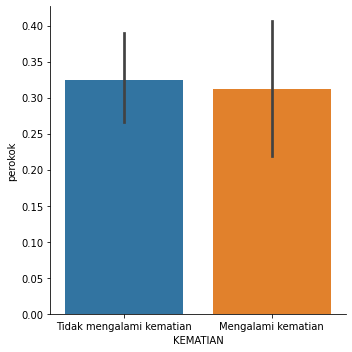

In [28]:
h2 = df[['perokok', 'KEMATIAN']]
sns.catplot(data=h2, x='KEMATIAN', y='perokok', kind='bar')
plt.xticks(ticks=(0,1),labels=['Tidak mengalami kematian','Mengalami kematian'])

**Perokok :**
Bisa di lihat bahwa perbandingan antara tidak mengalami kematian dan mengalami kematian pada penyakit perokok   ialah, jumlahnya bisa di bilang hampir sama, tetapi jika di hitung, yang tidak mengalami kematian itu lebih banyak, tetapi pasien harus menjaga kesehatan juga 

**Penyakit Anemia**

([<matplotlib.axis.XTick at 0x7f99fbfe4e10>,
 [Text(0, 0, 'Tidak mengalami kematian'), Text(1, 0, 'Mengalami kematian')])

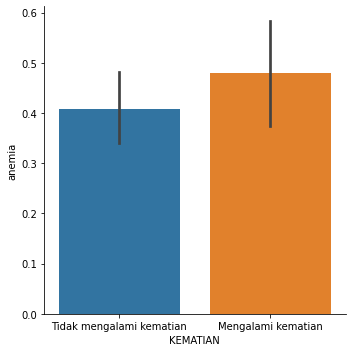

In [29]:
h3 = df[['anemia', 'KEMATIAN']]
sns.catplot(data=h3, x='KEMATIAN', y='anemia', kind='bar')
plt.xticks(ticks=(0,1),labels=['Tidak mengalami kematian','Mengalami kematian'])

**Penyakit anemia :**
Bisa di lihat bahwa perbandingan antara tidak mengalami kematian dan mengalami kematian pada penyakit anemia ialah, jumlah kematian pada pasien akibat penyakit ini lebih tinggi, penyakit ini juga akan berdampak pada penyakit karidovaskular. 

**Penyakit Diabetes**

([<matplotlib.axis.XTick at 0x7f99fbfd5f90>,
 [Text(0, 0, 'Tidak mengalami kematian'), Text(1, 0, 'Mengalami kematian')])

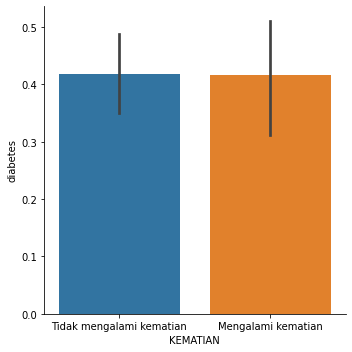

In [30]:
h4 = df[['diabetes', 'KEMATIAN']]
sns.catplot(data=h4, x='KEMATIAN', y='diabetes', kind='bar')
plt.xticks(ticks=(0,1),labels=['Tidak mengalami kematian','Mengalami kematian'])

**Penyakit diabetes :**
Bisa di lihat bahwa perbandingan antara tidak mengalami kematian dan mengalami kematian pada penyakit diabetes ialah, jumlah keduanya hampir seimbang, tetapi jika di perhatikan lagi, lebih banyak pasien yang mengalami kematian atas penyakit ini

**Penyakit Tekanan Darah Tinggi**

([<matplotlib.axis.XTick at 0x7f99fbf155d0>,
 [Text(0, 0, 'tidak mengalami kematian'), Text(1, 0, 'mengalami kematian')])

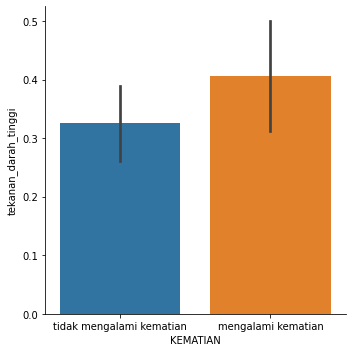

In [31]:
h8 = df[['tekanan_darah_tinggi', 'KEMATIAN']]
sns.catplot(data=h8, x='KEMATIAN', y='tekanan_darah_tinggi', kind='bar')
plt.xticks(ticks=(0,1), labels=['tidak mengalami kematian', 'mengalami kematian'])

**Penyakit tekanan darah tinggi** :
Bisa di lihat bahwa perbandingan antara tidak mengalami kematian dan mengalami kematian pada penyakit tekanan darah tinggi  ialah, pasien lebih banyak mengalami kematian pada penyakit ini dan akan menimbulkan penyakit baru contohnya penyakit yang berkomplikasi pada penyakit ini ialah penyakit karidovaskular atau penyakit gagal jantung 


0    203
1     96
Name: KEMATIAN, dtype: int64


([<matplotlib.axis.XTick at 0x7f99fbe9e210>,
 [Text(0, 0, 'Tidak Mengalami kematian'), Text(1, 0, 'mengalami kematian')])

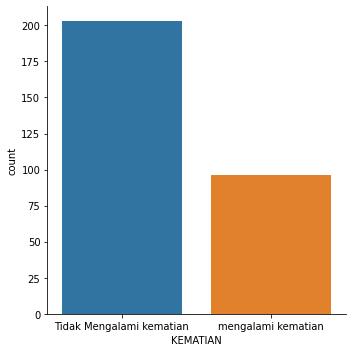

In [32]:
print(df['KEMATIAN'].value_counts())
sns.catplot(x = 'KEMATIAN', kind = 'count', data = df)
plt.xticks(ticks=(0,1),labels=['Tidak Mengalami kematian','mengalami kematian'])

**Kesimpulan**
Dapat diketahui bahwa penyakit anemia dan darah tinggi mempunyai angka mengalami kematian lebih tinggi dibandingkan orang perokok dan orang yang mempunyai penyakit diabetes 

**BoxPlot**
Melakukan visualisasi Boxplot untuk melihat distribusi data, outlier data dari setiap label dan penyakit pada pasien

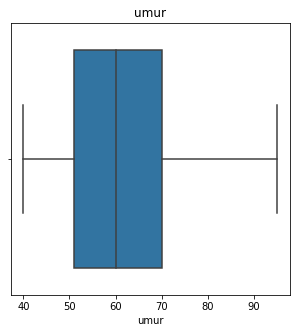

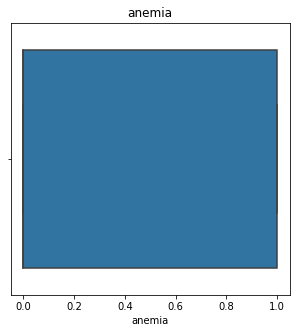

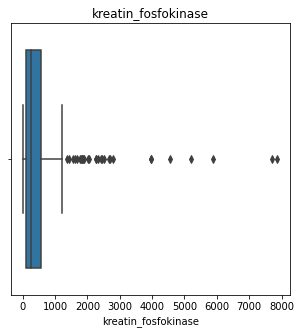

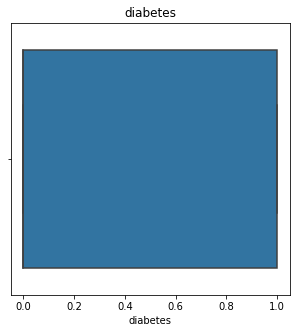

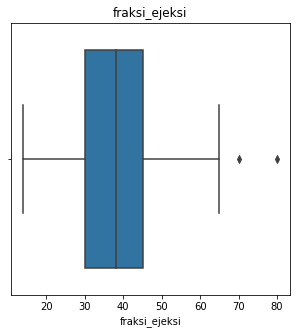

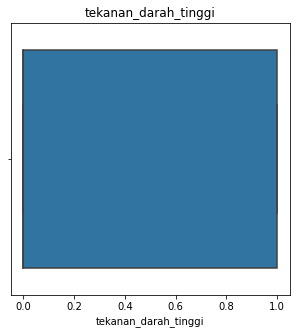

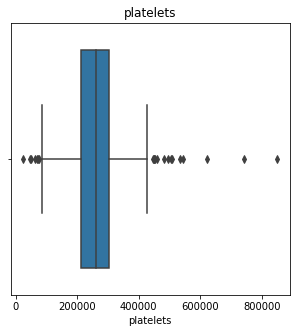

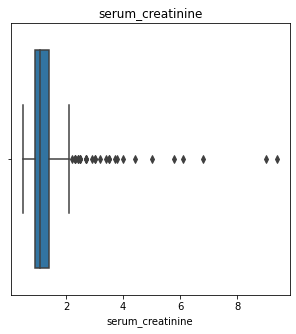

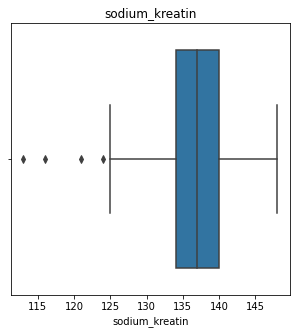

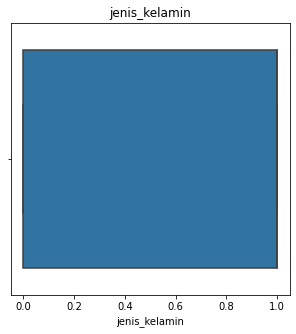

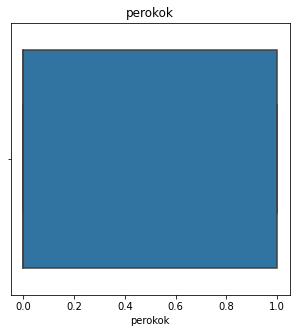

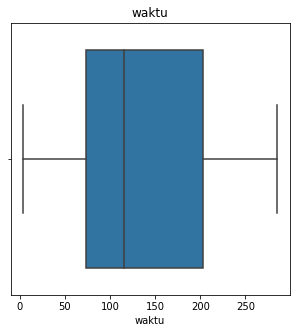

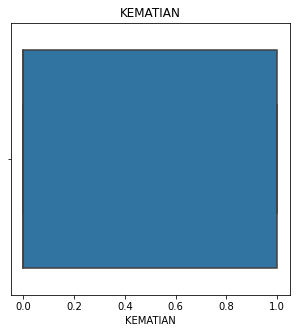

In [33]:
for feature in df:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[feature])
    plt.title(feature)

Diperoleh bahwa masih terdapat atribut dengan nilai outlier yang banyak.

# **F. Data Preprocessing**
Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

1. pertama kita akan mendefinisikan x dan y, yang nanntinya di pakai saat pemodelan pada dataset

In [34]:
X = df.drop(['KEMATIAN'], axis=1)
y = df['KEMATIAN']
print(X.shape)
print(y.shape)

(299, 12)
(299,)


2. selanjutnya Melakukan feature selection menggunakan library SequentialFeatureSelector dengan Metode Rergesi Linier

In [35]:
et=ExtraTreesClassifier()
et.fit(X,y)

ExtraTreesClassifier()

3. selanjutnya melakukan training data dan testing data dengan proporsi 0.8 dan 0.2

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=325)

# **G. Model Defining**
Metode pengujian pada training ini menggunakan metode naive bayes classifier, extra tree classifier, dan gradien boosting classifier. Alasan penggunaan metode ini yaitu tipe data prediksi yang berupa data kategorik, sehingga metode tersebut cocok digunakan.

**Random Forest Classifier**
Model pertama yakni model random forest classifier  dengan n estimator 10, max depth 10, min samples split 2

In [37]:
clf1 = RandomForestClassifier(n_estimators=10, max_depth=10,min_samples_split=2, random_state=0)

**Extra Tree Classifier**
Model kedua yakni model extra tree classifier dengan n estimator 10, max depth 5, min samples split 3

In [38]:
clf2 = ExtraTreesClassifier(n_estimators=10, max_depth=5, min_samples_split=3, random_state=1)

**Gradient Boosting Calssifier**
Model ketiga yakni model gradient boosting classifier dengan n estimator 100, learning rate 0.1, max depth 1

In [39]:
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=3)

# **H. Model Training**
pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

**Model 1 : Random Forest Classifier**

In [40]:
model1 = clf1.fit(X_train, y_train)

**Model 2 : Extra Tree Classifier**

In [41]:
model2 = clf2.fit(X_train, y_train)

**Model 3 : Gradient Boosting Classifier**

In [42]:
model3 = clf3.fit(X_train, y_train)

# **I. Model Evaluation**
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.

**Model 1 : Random Forest Classifier**

In [43]:
y_pred1 = clf1.predict(X_test)
print("Test score:", clf1.score(X_test, y_test))
print("Train score:", clf1.score(X_train, y_train))

Test score: 0.7888888888888889
Train score: 0.9952153110047847


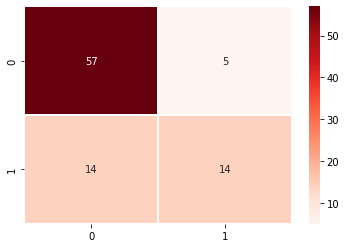

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        62
           1       0.74      0.50      0.60        28

    accuracy                           0.79        90
   macro avg       0.77      0.71      0.73        90
weighted avg       0.78      0.79      0.78        90



In [44]:
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()
print(classification_report(y_test, y_pred1))

In [45]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred1))
print('Presisi :', precision_score(y_test,y_pred1))
print('F1 Score :', f1_score(y_test,y_pred1))

Ringkasan Evaluasi Model
Akurasi : 0.7888888888888889
Presisi : 0.7368421052631579
F1 Score : 0.5957446808510638


**Model 2 : Extra Tree Classifier**

In [46]:
y_pred2 = clf2.predict(X_test)
print("Test score:", clf2.score(X_test, y_test))
print("Train score:", clf2.score(X_train, y_train))

Test score: 0.7111111111111111
Train score: 0.8803827751196173


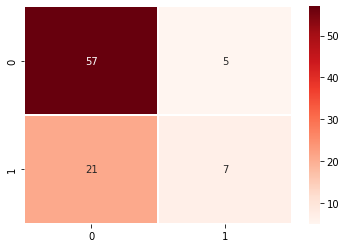

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        62
           1       0.58      0.25      0.35        28

    accuracy                           0.71        90
   macro avg       0.66      0.58      0.58        90
weighted avg       0.68      0.71      0.67        90



In [47]:
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()
print(classification_report(y_test, y_pred2))

In [48]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred2))
print('Presisi :', precision_score(y_test,y_pred2))
print('F1 Score :', f1_score(y_test,y_pred2))

Ringkasan Evaluasi Model
Akurasi : 0.7111111111111111
Presisi : 0.5833333333333334
F1 Score : 0.35000000000000003


**Model 3 : Gradient Boosting Classifier**

In [49]:
y_pred3 = clf3.predict(X_test)
print("Test score:", clf3.score(X_test, y_test))
print("Train score:", clf3.score(X_train, y_train))

Test score: 0.8
Train score: 0.9090909090909091


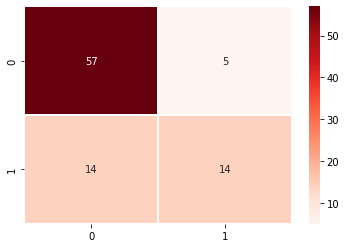

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        62
           1       0.71      0.61      0.65        28

    accuracy                           0.80        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.79      0.80      0.80        90



In [50]:
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()
print(classification_report(y_test, y_pred3))

In [51]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred3))
print('Presisi :', precision_score(y_test,y_pred3))
print('F1 Score :', f1_score(y_test,y_pred3))

Ringkasan Evaluasi Model
Akurasi : 0.8
Presisi : 0.7083333333333334
F1 Score : 0.6538461538461539


Diperoleh bahwa:

- Model ketiga memiliki evaluasi model paling baik dibanding kedua model lainnya
- Model pertama dan kedua diindikasikan adanya overfitting
- Model yang dipilih untuk deployment yakni model ketiga

# **J. Model Inference**
Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

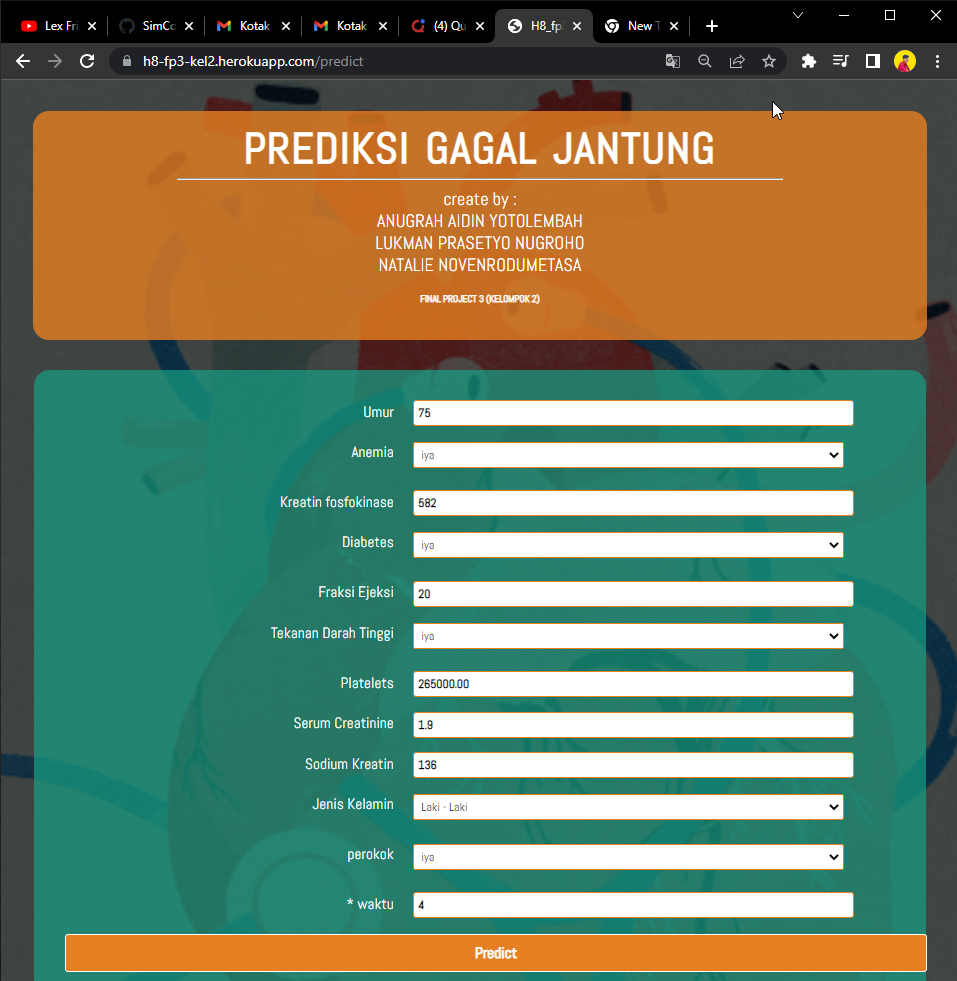

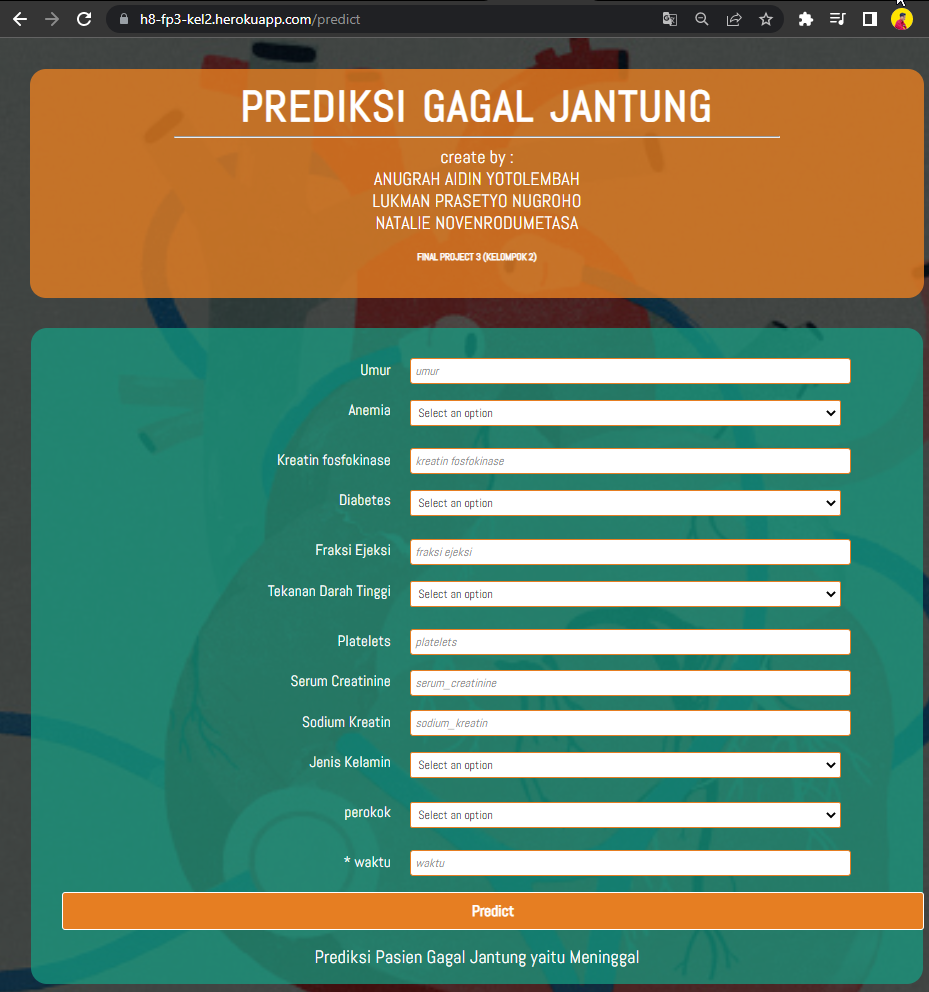

# **Conclusions**
Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:

- Terdapat 13 atribut yang diasumsikan memengaruhi penyakit kardiovaskular . Setelah dilakukan analisis, diambil 4 atribut/faktor yang paling berpengaruh dalam model.
- Faktor-faktor yang berpengaruh signifikan terhadap kematian pasien gagal jantung yaitu penyakit tekanan darah tinggi, kreatin fofokinase, serum kreatin dan umur.
- jika di lihat informasi berdasarkan visualisasi pada dataset, penyakit karidovaskular(CVDs) ini pasiennya lebih banyak tidak mengalami kematian, meskipun begitu ada beberapa penyakit lain yang dapat menimbulkan penyakit karidovaskular ini sehingga dapat membahayakan pasien hingga pasien bisa mengalami kematian

- Model ensemble yang paling optimal yaitu model ketiga, diperoleh akurasi testing 80%.

https://h8-fp3-kel2.herokuapp.com/predict

In [52]:
pickle.dump(clf3, open('modelfp3.pkl','wb'))